In [1]:
import pandas as pd

In [3]:
# read kaggle taitanic train data
target_file_path = "../titanic/train.csv"
df_origin = pd.read_csv(target_file_path)

df_origin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 前処理

In [4]:
from sklearn.model_selection import train_test_split

#欠損値処理
df_origin['Fare'] = df_origin['Fare'].fillna(df_origin['Fare'].median())
df_origin['Age'] = df_origin['Age'].fillna(df_origin['Age'].median())
df_origin['Embarked'] = df_origin['Embarked'].fillna('S')

#カテゴリ変数の変換
df_origin['Sex'] = df_origin['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_origin['Embarked'] = df_origin['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#学習データと検証データに分割
df_origin = df_origin.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X = df_origin.drop('Survived', axis=1)
train_y = df_origin.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

### 学習

In [5]:
from sklearn.tree import DecisionTreeClassifier

#モデルを定義
#設定可能なパラメータはドキュメントを参照
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#criterion : 分割基準。gini or entropy(デフォルトでジニ係数)
#max_depth : 木の深さ。木が深くなるほど過学習し易いので、適当な閾値を設定してあげる。
#max_features：最適な分割をする際の特徴量の数
#min_samples_split：分岐する際のサンプル数
#random_state：ランダムseedの設定。seedを設定しないと、毎回モデル結果が変わるので注意。


clf = DecisionTreeClassifier(random_state=0)

#fitで学習
clf = clf.fit(train_X, train_y)

#予測
pred = clf.predict(test_X)

### 精度の確認

In [6]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

#機械学習における指標はhttps://www.randpy.tokyo/entry/roc_aucが分かりやすい
#AUCは、機械学習でよく使われるモデルの評価指標で、1に近づくほど精度が高い

fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
print("AUC:{}".format(auc(fpr, tpr)))
print("正解率:{}".format(accuracy_score(pred, test_y)))

AUC:0.7837689688996596
正解率:0.7947761194029851


### 木構造の可視化
```pip install pydotplus```    
```brew install graphviz```    
をあらかじめ行っておくこと

In [9]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


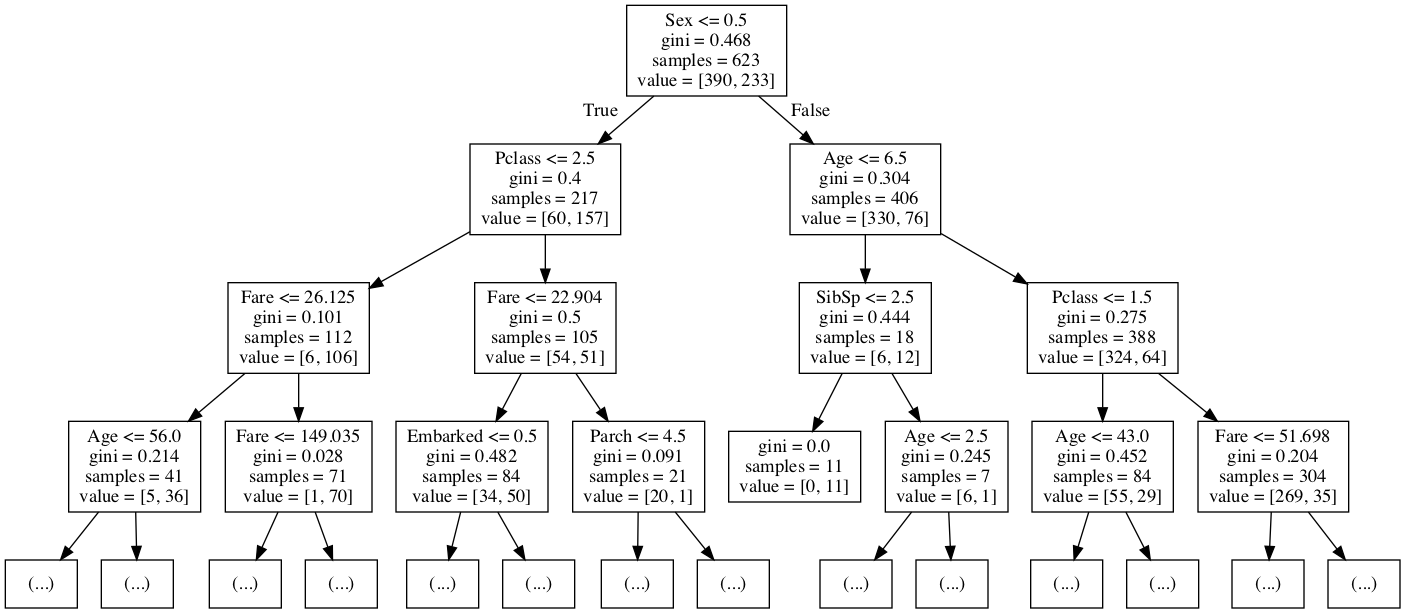

In [10]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())